In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
df.shape

(5000, 14)

In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [7]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
df.drop('ID', axis = 1, inplace = True)

# Data Visualization

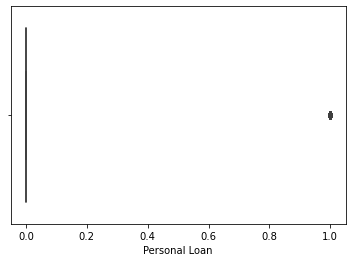

In [10]:
#checking the outlier of Personal Loan
sns.boxplot(df['Personal Loan']);
plt.show()

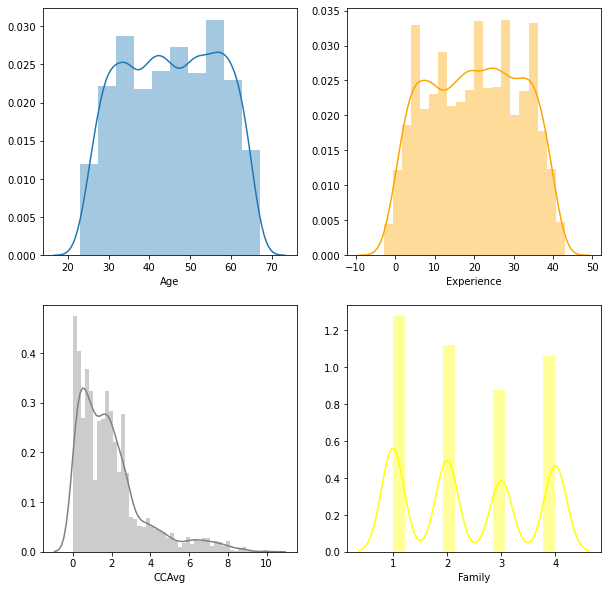

In [28]:
fig, axis = plt.subplots(2, 2, figsize=(10, 10), sharex=False)
sns.distplot(df['Age'],bins=10,ax=axis[0,0]);
sns.distplot(df['Experience'],ax=axis[0,1],color='orange');
sns.distplot(df['CCAvg'],ax=axis[1,0],color='gray');
sns.distplot(df['Family'],ax=axis[1,1],color='yellow');
plt.show()

In [12]:
df['Income']=df['Income']/12 
df['Mortgage']=df['Mortgage']/10 

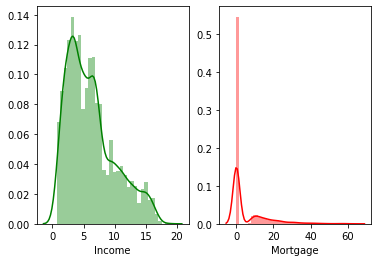

In [13]:
fig, axis = plt.subplots(1,2, figsize=(6,4), sharex=False)
sns.distplot(df['Income'],ax=axis[0],color='green');
sns.distplot(df['Mortgage'],ax=axis[1],color='red');
plt.show()

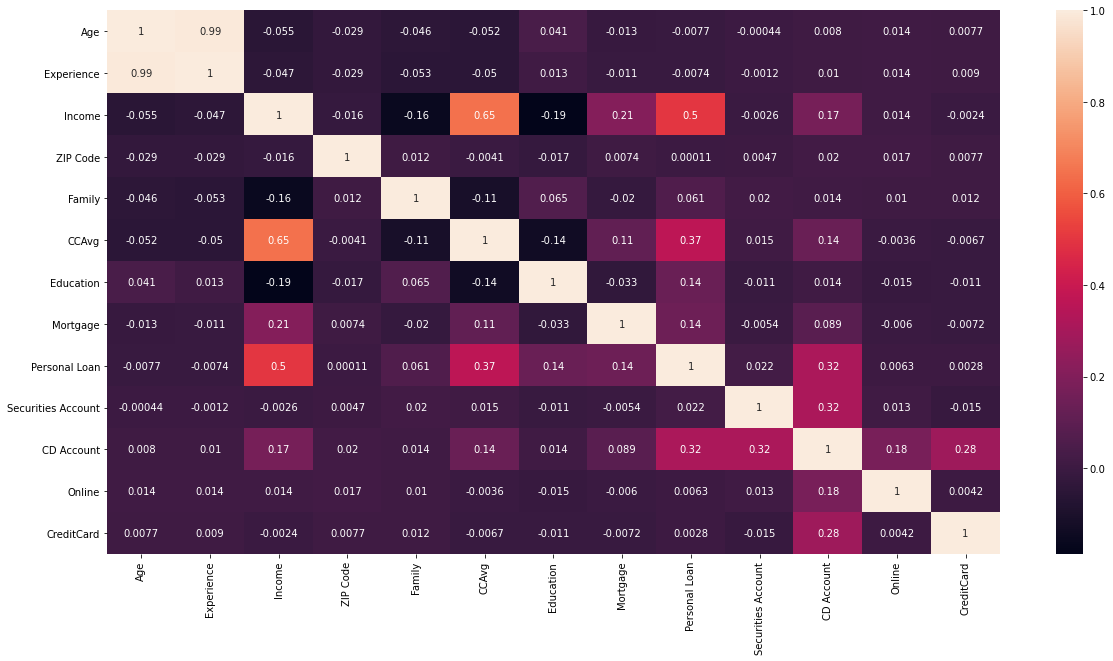

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True);
plt.show()

In [15]:
#Spliting the data for the model training
x = df.drop(['Personal Loan'],axis=1)
y = df['Personal Loan']

In [16]:
#spliting the data into 70/30
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

# Logistic Regression : Classification model

In [17]:
from sklearn.linear_model import LogisticRegression

logiR = LogisticRegression()
logiR.fit(x_train,y_train)

logiR_test = logiR.predict(x_test)

In [18]:
print("Classification Report")
print(classification_report(y_test,logiR_test))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1342
           1       0.57      0.32      0.41       158

    accuracy                           0.90      1500
   macro avg       0.75      0.64      0.68      1500
weighted avg       0.89      0.90      0.89      1500



# It is imbalance classification report so we need to change threshold to change confusion matrix

In [19]:
logiR_predict_train=logiR.predict_proba(x_train)[:,1] > 0.8
logiR_predict_test=logiR.predict_proba(x_test)[:,1] > 0.8 

In [20]:
print("Classification Report")
cm=classification_report(y_test,logiR_predict_test,labels=[1,0])
print(cm)

Classification Report
              precision    recall  f1-score   support

           1       0.33      0.01      0.02       158
           0       0.90      1.00      0.94      1342

    accuracy                           0.89      1500
   macro avg       0.61      0.50      0.48      1500
weighted avg       0.84      0.89      0.85      1500



# By building logistic regression model we get accuracy of 0.89 but we are buidling another model to get better values of precision,recall and f1-score 

# Naive Bayes classification model

In [21]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(x_train,y_train) 

GaussianNB()

In [23]:
gnb_predict_test=gnb.predict_proba(x_test)[:,1] > 0.8 
print(classification_report(y_test,gnb_predict_test,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.50      0.55      0.53       158
           0       0.95      0.94      0.94      1342

    accuracy                           0.90      1500
   macro avg       0.72      0.74      0.73      1500
weighted avg       0.90      0.90      0.90      1500



# By building Naive Bayes classification model we get accuracy of 0.90 and also get better values of precision,recall and f1-score than Logistic Regression model